In [1]:
using LCIO
using StatsPlots

In [2]:
#### DBD & SGV
const jetColName = "Refined2Jets"
const btagAlgoName = "lcfiplus"
const btagParName = "BTag"
const isDelphes = false

#### delphes2lcio
# const jetColName = "Jets"
# const btagAlgoName = "JetParameters"
# const btagParName = "BTag"
# const isDelphes = true

false

In [3]:
const FILEN = "/collab/project/snowmass21/data/ilc/tutorial/rv01-16-p10_250.sv01-14-01-p00.mILD_o1_v05.E250-TDR_ws.I106480.Pe2e2h.eR.pL-00001-ILDminiDST.slcio"
btagList = Float64[]
fail2jet = 0
nEvents = 0
LCIO.open(FILEN) do reader
    for event in reader
        global fail2jet
        global nEvents
        nEvents += 1
        jets = getCollection(event, jetColName)
        # for simplicity only consider events with two jets
        if length(jets) != 2
            fail2jet += 1
            continue
        end
        # create a PID handler to access th b-tag information
        pidh = PIDHandler(jets)
        ilcfi = getAlgorithmID(pidh, btagAlgoName)
        ibtag = getParameterIndex(pidh, ilcfi, btagParName)
        for ajet in jets
            # get their b-tag value
            btag = getParameters(getParticleID(pidh, ajet, ilcfi))[ibtag]
            push!(btagList, btag)
        end
    end
end

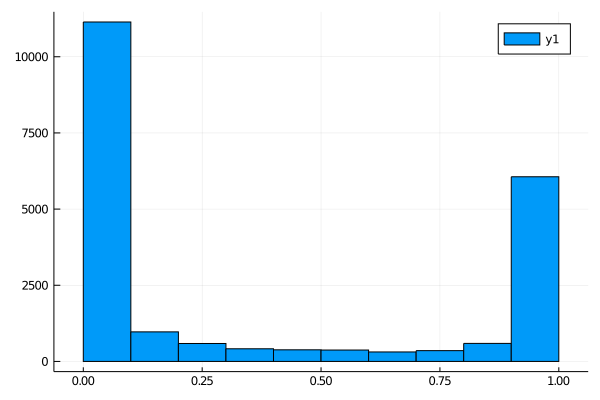

In [4]:
histogram(btagList)

In [5]:
println(nEvents, " events read from file: ", FILEN)
println(" out of which ", fail2jet, " events don't have two jets")

10983 events read from file: /collab/project/snowmass21/data/ilc/tutorial/rv01-16-p10_250.sv01-14-01-p00.mILD_o1_v05.E250-TDR_ws.I106480.Pe2e2h.eR.pL-00001-ILDminiDST.slcio
 out of which 389 events don't have two jets
